<a href="https://colab.research.google.com/github/NiloferMubeen/Forest_cover_type_prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 1️⃣ Load the Data

In [ ]:
import pandas as pd

data = pd.read_csv('/content/cover_type.csv')
data.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen


In [ ]:
data.shape

(145890, 55)

📌 2️⃣ Handle Missing Values

In [ ]:
# Check missing values
print(data.isnull().sum())

# Fill numeric NaNs with median
data.fillna(data.mode(), inplace=True)


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [ ]:
data.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


📌 3️⃣ Perform Sampling to Balance Classes

In [ ]:
data['Cover_Type'].value_counts()

,count
Cover_Type,
Lodgepole Pine,103071
Spruce/Fir,31110
Aspen,3069
Krummholz,2160
Ponderosa Pine,2160
Douglas-fir,2160
Cottonwood/Willow,2160


In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check new distribution
print(pd.Series(y_resampled).value_counts())


Cover_Type
Aspen                103071
Lodgepole Pine       103071
Spruce/Fir           103071
Krummholz            103071
Ponderosa Pine       103071
Douglas-fir          103071
Cottonwood/Willow    103071
Name: count, dtype: int64


In [ ]:
X_resampled.shape

(721497, 54)

📌 4️⃣ Check & Handle Skewness

In [ ]:
skewed_features = X_resampled.skew().sort_values(ascending=False)
print(skewed_features)

Soil_Type_25                          849.409795
Soil_Type_28                           91.578027
Soil_Type_7                            82.875984
Soil_Type_27                           63.822186
Soil_Type_21                           56.350815
Soil_Type_8                            50.732495
Soil_Type_36                           44.985396
Soil_Type_34                           41.263475
Soil_Type_26                           26.885991
Soil_Type_9                            21.877940
Soil_Type_37                           21.278683
Soil_Type_22                           17.176167
Soil_Type_19                           16.267220
Soil_Type_35                           12.297930
Soil_Type_31                           11.828213
Soil_Type_24                           10.744418
Soil_Type_18                            9.776977
Soil_Type_5                             9.379327
Soil_Type_14                            9.318768
Soil_Type_16                            8.987813
Soil_Type_32        

In [ ]:
import numpy as np

cols_to_transform = skewed_features[skewed_features > 1].index.tolist()

for col in cols_to_transform:
    X_resampled[col] = np.log1p(X_resampled[col])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Check for NaNs and Infs
print(np.isinf(X_resampled).sum().sum())   # total infinities
print(X_resampled.isnull().sum().sum())   # total NaNs


5547
46842


In [ ]:
X_resampled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_resampled.fillna(X_resampled.median(), inplace=True)

#📌 5️⃣ Drop Unnecessary Columns

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
selector.fit(X_resampled)

# Get columns to drop (if any)
zero_variance_cols = X_resampled.columns[~selector.get_support()]
print(zero_variance_cols)


Index(['Soil_Type_15'], dtype='object')


In [ ]:
X_resampled.drop(columns=zero_variance_cols, inplace=True)


In [ ]:
X_resampled.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2596,51,3,5.556828,0.000000,510,221,232,148,8.745125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590,56,2,5.361292,3.496508,390,220,235,151,8.736489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804,139,9,5.594711,4.189655,3180,234,238,135,8.719644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785,155,18,5.493061,4.779123,3090,238,238,122,8.734238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595,45,2,5.036953,3.496508,391,220,234,150,8.727940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels to start from 0
le = LabelEncoder()
y_resampled = le.fit_transform(y_resampled)


In [ ]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

<Axes: >

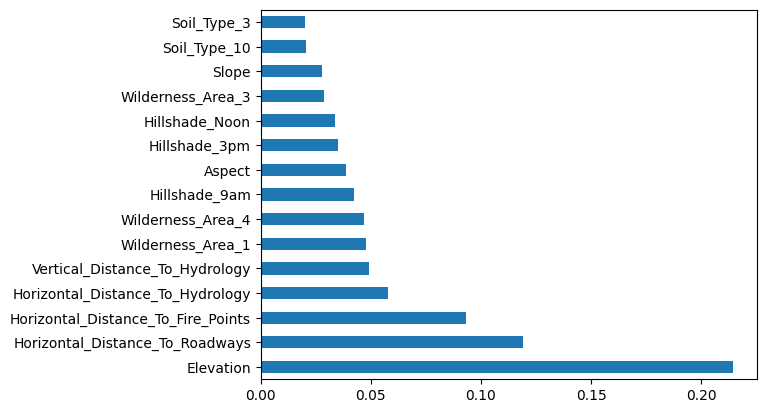

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Build Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(15).plot(kind='barh')


In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
print(importances.head(15))


Elevation                             0.214460
Horizontal_Distance_To_Roadways       0.119088
Horizontal_Distance_To_Fire_Points    0.093119
Horizontal_Distance_To_Hydrology      0.057840
Vertical_Distance_To_Hydrology        0.048964
Wilderness_Area_1                     0.047961
Wilderness_Area_4                     0.046925
Hillshade_9am                         0.042281
Aspect                                0.038635
Hillshade_3pm                         0.034965
Hillshade_Noon                        0.033726
Wilderness_Area_3                     0.028872
Slope                                 0.028024
Soil_Type_10                          0.020751
Soil_Type_3                           0.019898
dtype: float64


In [ ]:
top_15_features = importances.head(15).index.tolist()
print(top_15_features)


['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Wilderness_Area_1', 'Wilderness_Area_4', 'Hillshade_9am', 'Aspect', 'Hillshade_3pm', 'Hillshade_Noon', 'Wilderness_Area_3', 'Slope', 'Soil_Type_10', 'Soil_Type_3']


In [ ]:
X_train_top15 = X_train[top_15_features]
X_test_top15 = X_test[top_15_features]


In [ ]:
rf_top15 = RandomForestClassifier(random_state=42)
rf_top15.fit(X_train_top15, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_top15 = rf_top15.predict(X_test_top15)

print("Accuracy:", accuracy_score(y_test, y_pred_top15))
print(classification_report(y_test, y_pred_top15))
print(confusion_matrix(y_test, y_pred_top15))


Accuracy: 0.9946084546084546
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30921
           1       1.00      1.00      1.00     30921
           2       1.00      1.00      1.00     30921
           3       1.00      1.00      1.00     30922
           4       1.00      0.97      0.98     30922
           5       1.00      1.00      1.00     30921
           6       0.97      1.00      0.98     30922

    accuracy                           0.99    216450
   macro avg       0.99      0.99      0.99    216450
weighted avg       0.99      0.99      0.99    216450

[[30921     0     0     0     0     0     0]
 [    0 30921     0     0     0     0     0]
 [    0     0 30921     0     0     0     0]
 [    0     0     0 30922     0     0     0]
 [   91     0    22     6 29899    19   885]
 [    0     0     0     0     0 30921     0]
 [    0     0     0     8   136     0 30778]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42)
}


In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train_top15, y_train)
    y_pred = model.predict(X_test_top15)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Random Forest Accuracy: 0.9946
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30921
           1       1.00      1.00      1.00     30921
           2       1.00      1.00      1.00     30921
           3       1.00      1.00      1.00     30922
           4       1.00      0.97      0.98     30922
           5       1.00      1.00      1.00     30921
           6       0.97      1.00      0.98     30922

    accuracy                           0.99    216450
   macro avg       0.99      0.99      0.99    216450
weighted avg       0.99      0.99      0.99    216450


Decision Tree Accuracy: 0.9934
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30921
           1       1.00      1.00      1.00     30921
           2       1.00      1.00      1.00     30921
           3       1.00      1.00      1.00     30922
           4       0.99      0.96      0.98     30922
           5  

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.6013
              precision    recall  f1-score   support

           0       0.56      0.62      0.59     30921
           1       0.70      0.77      0.73     30921
           2       0.48      0.54      0.51     30921
           3       0.88      0.91      0.89     30922
           4       0.48      0.44      0.46     30922
           5       0.50      0.37      0.43     30921
           6       0.58      0.55      0.56     30922

    accuracy                           0.60    216450
   macro avg       0.60      0.60      0.60    216450
weighted avg       0.60      0.60      0.60    216450


KNN Accuracy: 0.9552
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30921
           1       1.00      1.00      1.00     30921
           2       0.99      1.00      1.00     30921
           3       0.99      1.00      1.00     30922
           4       0.91      0.77      0.84     30922
           5      

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:37:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.9766
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30921
           1       1.00      1.00      1.00     30921
           2       0.99      1.00      1.00     30921
           3       1.00      1.00      1.00     30922
           4       0.95      0.90      0.92     30922
           5       1.00      0.99      1.00     30921
           6       0.92      0.94      0.93     30922

    accuracy                           0.98    216450
   macro avg       0.98      0.98      0.98    216450
weighted avg       0.98      0.98      0.98    216450



In [ ]:
import pandas as pd

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nModel Performance Comparison:\n")
print(results_df)



Model Performance Comparison:

                     Accuracy
Random Forest        0.994608
Decision Tree        0.993407
XGBoost              0.976637
KNN                  0.955177
Logistic Regression  0.601317


# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create Random Forest model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30,  # number of random combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on top 15 feature training data
random_search.fit(X_train_top15, y_train)

# Best parameters
print("\nBest Parameters:")
print(random_search.best_params_)

# Best estimator
best_rf = random_search.best_estimator_

# Evaluate tuned RF model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_tuned = best_rf.predict(X_test_top15)

print("\nAccuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))
print(confusion_matrix(y_test, y_pred_tuned))


In [ ]:
results_df = pd.DataFrame(random_search.cv_results_)
results_df = results_df.sort_values(by='mean_test_score', ascending=False)
print(results_df[['params', 'mean_test_score']].head())


# Model saving

In [ ]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(rf_top15, f)

# Streamlit

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.4 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import streamlit as st
import numpy as np
import pickle

# Load the trained model
with open("model.pkl", "rb") as f:   # replace with your actual model file name
    model = pickle.load(f)

# Load label encoder
with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

st.title("🌲 Forest Cover Type Prediction App")

st.write("Enter the values for the following features to predict the forest cover type:")

# Collecting user inputs
Elevation = st.number_input("Elevation", min_value=0, max_value=5000, value=2000)
Horizontal_Distance_To_Roadways = st.number_input("Horizontal Distance To Roadways", min_value=0, max_value=10000, value=500)
Horizontal_Distance_To_Fire_Points = st.number_input("Horizontal Distance To Fire Points", min_value=0, max_value=10000, value=600)
Horizontal_Distance_To_Hydrology = st.number_input("Horizontal Distance To Hydrology", min_value=0, max_value=10000, value=300)
Wilderness_Area_1 = st.selectbox("Wilderness Area 1", [0, 1])
Vertical_Distance_To_Hydrology = st.number_input("Vertical Distance To Hydrology", min_value=-1000, max_value=1000, value=50)
Wilderness_Area_4 = st.selectbox("Wilderness Area 4", [0, 1])
Hillshade_9am = st.slider("Hillshade 9am", min_value=0, max_value=255, value=150)
Aspect = st.slider("Aspect", min_value=0, max_value=360, value=90)
Hillshade_3pm = st.slider("Hillshade 3pm", min_value=0, max_value=255, value=100)
Hillshade_Noon = st.slider("Hillshade Noon", min_value=0, max_value=255, value=200)
Slope = st.slider("Slope", min_value=0, max_value=90, value=10)
Wilderness_Area_3 = st.selectbox("Wilderness Area 3", [0, 1])
Soil_Type_10 = st.selectbox("Soil Type 10", [0, 1])
Soil_Type_3 = st.selectbox("Soil Type 3", [0, 1])

# Arrange inputs into feature vector
features = np.array([[
    Elevation,
    Horizontal_Distance_To_Roadways,
    Horizontal_Distance_To_Fire_Points,
    Horizontal_Distance_To_Hydrology,
    Wilderness_Area_1,
    Vertical_Distance_To_Hydrology,
    Wilderness_Area_4,
    Hillshade_9am,
    Aspect,
    Hillshade_3pm,
    Hillshade_Noon,
    Slope,
    Wilderness_Area_3,
    Soil_Type_10,
    Soil_Type_3
]])

# Predict
if st.button("Predict Forest Cover Type"):
    prediction_encoded = model.predict(features)  # This gives encoded number
    prediction_label = label_encoder.inverse_transform(prediction_encoded)  # Convert back to class name
    st.success(f"🌳 Predicted Forest Cover Type: **{prediction_label[0]}**")


Overwriting app.py


In [ ]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
import subprocess
subprocess.Popen(["./cloudflared-linux-amd64", "tunnel", "--url", "http://localhost:8501"])
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

--2025-09-24 06:42:39--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.9.1/cloudflared-linux-amd64 [following]
--2025-09-24 06:42:39--  https://github.com/cloudflare/cloudflared/releases/download/2025.9.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/e30ab3bb-4e6a-464a-8db5-d5cabe6a2f8d?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-24T07%3A31%3A51Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-24T0

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"

Your tunnel url https://mobiles-adsl-control-books.trycloudflare.com
